# Tarea: Análisis Visual de Ventas de Tienda de Conveniencia

### **Equipo:**

*   Mauricio Contreras Sepúlveda
*   Dianna Monsalve Pérez
*   Cristian Romero Saavedra
*   Elías Santacruz Yunga

### **Grupo:** 62
### **Curso:** Visualización de Datos en Python

## Descripción del Caso

Una cadena de tiendas de conveniencia quiere analizar sus ventas y el comportamiento de los clientes para mejorar su estrategia de marketing. Para ello, han recopilado un conjunto de datos que incluye información sobre las ventas, los productos y los clientes. Su misión será usar las técnicas de visualización de datos aprendidas para analizar y presentar los resultados de este conjunto de datos.

## Indicaciones Generales

1.  **Dataset:** Utilizarán el dataset "Supermarket Sales" disponible en Kaggle (data.csv).
2.  **Entorno:** Trabajen según las indicaciones de este notebook.
3.  **Colaboración:** Esta es una tarea grupal. Asegúrense de coordinar el trabajo.
4.  **Streamlit:** Se requiere crear un dashboard interactivo usando la librería Streamlit. Deberán escribir y ejecutar su código como script the python (archivo .py), pero deben también escribir el código en una celda dentro de éste jupyter notebook para su revisión.
5.  **Pensamiento Crítico:** Incluyan reflexiones y justificaciones para sus elecciones de visualización y análisis.
6.  **Entrega:** Entreguen este notebook completado según las indicaciones.

-----

## Desarrollo - Caso de aplicación (PDF)

## 1. Selección de Variables y desarrollo de Análisis


a.  Examinen el conjunto de datos proporcionado (`df.info()`, `df.describe()`, `df.columns`).

b.  Identifiquen y **justifiquen** las variables que consideren más relevantes para un análisis significativo del comportamiento de ventas y clientes. 

c.  Reflexionen sobre la importancia de cada variable seleccionada en el contexto del caso de estudio (¿Qué preguntas de negocio pueden ayudar a responder?).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import streamlit as st

-----

## 1\. Selección de Variables y desarrollo de Análisis

### **A. Examinen el conjunto de datos proporcionado (`df.info()`, `df.describe()`, `df.columns`).**

In [3]:
# Carga del conjunto de datos
df = pd.read_csv('data.csv')

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convertir la columna 'Time' a tipo datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Examinar el conjunto de datos proporcionado
print("Información del DataFrame (df.info()):")
df.info()

print("\nEstadísticas descriptivas (df.describe()):")
print(df.describe())

print("\nColumnas del DataFrame (df.columns):")
print(df.columns)

print("\nPrimeras 5 filas del DataFrame (df.head()):")
print(df.head())

Información del DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 

### **A1. Resumen del análisis exploratorio de datos**
Se realizó un análisis exploratorio de datos en un conjunto de datos con 1000 registros y 17 columnas. 
A continuación, se presentan los hallazgos clave:

**Estructura del conjunto de datos**

* Filas: 1.000 transacciones de ventas.

* Columnas: 17 variables (mezcla de datos numéricos, categóricos y fechas).

* Sin valores nulos: Todas las columnas están completas.

**Tipos de datos**

Las columnas tienen los siguientes tipos de datos:

* Object (cadena de texto): Invoice ID, Branch, City, Customer type, Gender, Product line, Time, Payment.
* Float64 (número decimal): Unit price, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating.
* Int64 (número entero): Quantity.
* Datetime64 (fecha y hora): Date.

**Variables clave**

**Numéricas:**

* El precio unitario promedio es de $55.67.
* La cantidad promedio de productos vendidos es de 5.51.
* El impuesto promedio es de $15.37.
* El total promedio de las facturas es de $322.97.
* La calificación promedio es de 6.97.

**Categóricas:**

* Branch (Sucursales): A, B, C.
* City (Ciudades): Yangon, Naypyitaw, Mandalay.
* Payment (Métodos de pago): Ewallet, Cash, Credit card.
* Product line (Categorías): 6 tipos (ej. "Health and beauty", "Electronic accessories").

**Hallazgos relevantes**

**Distribución de precios:**

*   50% de los productos tienen un precio entre 32.87 y 77.93 (rango intercuartil).

**Volumen de ventas:**

*   La transacción típica incluye 5 productos, pero hay casos extremos de 10 unidades.

**Temporalidad:**

*   Datos de enero a marzo de 2019, con una distribución uniforme en el tiempo.

**Margen constante:**

*   gross margin percentage es siempre 4.76% (columna redundante).



### **B.  Identifición y justificación de las variables que consideren más relevantes para un análisis significativo.**

De acuerdo a la revisión del conjunto de datos, hemos identificado las variables que podrían ser relevantes para un análisis significativo. Al analizar estas variables de manera conjunta, podremos identificar patrones y tendencias que nos permitan tomar decisiones informadas para mejorar la rentabilidad y la eficiencia del negocio.

Lista de variables seleccionadas:

1. Product line.
2. Unit price.
3. Quantity.
4. Total.
5. Gross income.
6. Payment.
7. Rating.
8. Customer type (Member/Normal). 
9. Gender.
10. City.
11. Branch.
12. Date.
13. Time.
14. Tax 5%.
15. Cogs. 

#### **Justificación de las variables seleccionadas**

A continuación, se presentan las justificaciones detalladas para cada una de las variables seleccionadas:

**Análisis de ventas y rentabilidad**

*  **Product line:** La variable "Product line" es fundamental para analizar las ventas y la rentabilidad porque permite identificar qué productos o categorías de productos son más rentables y cuáles necesitan mejoras. Al analizar las ventas y la rentabilidad por producto, se pueden tomar decisiones informadas sobre la estrategia de marketing y el desarrollo de productos.

*  **Unit price:** La variable "Unit price" es importante porque permite analizar cómo el precio unitario afecta las ventas y la rentabilidad. Al entender la relación entre el precio unitario y las ventas, se pueden tomar decisiones informadas sobre la estrategia de precios.

*  **Quantity:** La variable "Quantity" es fundamental porque permite analizar la cantidad de productos vendidos y su impacto en las ventas y la rentabilidad. Al entender la relación entre la cantidad vendida y las ventas, se pueden tomar decisiones informadas sobre la gestión de inventarios y la producción.

*  **Total:** La variable "Total" es importante porque permite analizar el total de ventas y su impacto en la rentabilidad. Al entender el total de ventas, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de recursos.

* **Gross income:** La variable "Gross income" es fundamental porque permite analizar la rentabilidad de las ventas y su impacto en la empresa. Al entender la rentabilidad de las ventas, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de recursos.

* **Tax 5%:** La variable "Tax 5%" es importante porque permite calcular el costo total y analizar la rentabilidad de los productos o servicios, considerando el impuesto sobre las ventas que puede afectar la rentabilidad y permitiendo tomar decisiones informadas sobre la estrategia de precios y la gestión de costos.

* **cogs:** La variable "cogs" es fundamental para calcular el costo directo y analizar la rentabilidad de los productos o servicios, permitiendo a las empresas identificar oportunidades para reducir costos y mejorar la eficiencia.

**Análisis de cliente**

* **Rating:** La variable "Rating" es importante porque permite analizar la satisfacción del cliente y su relación con las ventas y la rentabilidad. Al entender la satisfacción del cliente, se pueden tomar decisiones informadas sobre la estrategia de marketing y la mejora de la experiencia del cliente.

* **Gender:** La variable "Gender" es relevante porque permite analizar las preferencias y comportamientos de los clientes en función de su género. Al entender las preferencias y comportamientos de los clientes en función de su género, se pueden tomar decisiones informadas sobre la estrategia de marketing y la personalización de la experiencia del cliente.

* **Customer type:** La variable "Customer type" es fundamental porque permite analizar la relación del cliente con la empresa y su nivel de compromiso. Al entender la relación del cliente con la empresa, se pueden tomar decisiones informadas sobre la estrategia de marketing y la retención de clientes.

**Análisis geográfico**

* **City:** La variable "City" es importante porque permite analizar las ventas y la rentabilidad por ubicación geográfica. Al entender las ventas y la rentabilidad por ciudad, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de recursos.

* **Branch:** La variable "Branch" es relevante porque permite analizar las ventas y la rentabilidad por sucursal. Al entender las ventas y la rentabilidad por sucursal, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de recursos.

**Análisis de métodos de pago**

* **Payment:** La variable "Payment" es importante porque permite analizar los métodos de pago preferidos por los clientes y su impacto en las ventas. Al entender los métodos de pago preferidos por los clientes, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de pagos.

**Análisis de estacionalidad de las ventas**

* **Date:** La variable "Date" es fundamental porque permite analizar la estacionalidad de las ventas y su impacto en la rentabilidad. Al entender la estacionalidad de las ventas, se pueden tomar decisiones informadas sobre la estrategia de marketing y la gestión de inventarios.

**Análisis de horarios del día**

* **Time:** La variable "Time" es relevante porque permite analizar los horarios del día en los que se producen más transacciones o ventas. Al entender los horarios del día con mayor actividad, se pueden tomar decisiones informadas sobre la atención al cliente y la gestión de inventarios.



### **C. Reflexion sobre la importancia de cada variable seleccionada (¿Qué preguntas de negocio pueden ayudar a responder?).**

A continuación se presentan las reflexiones sobre la importancia de cada variable seleccionada y sus respectivas preguntas que puden apoyar al negocio:

**1. Product line:** La línea de producto es fundamental para entender las ventas y rentabilidad de cada categoría, evaluar la efectividad de la gestión de inventario y ajustar las estrategias de precios.

* ¿Cuál es el rendimiento de las ventas para cada línea de producto?
* ¿Cuál es la línea de producto con mayor volumen de ventas?
* ¿Cuál es la línea de producto con mayor rentabilidad?

**2. Unit price:** El precio unitario es fundamental para calcular las ventas y rentabilidad, y evaluar la competencia para ajustar las estrategias de precios.

* ¿Cuál es el precio promedio de los productos vendidos?
* ¿Cuál es el producto con mayor precio unitario?
* Cuál es el producto con menor precio unitario?

**3. Quantity:** La cantidad vendida es importante para entender el volumen de ventas y rentabilidad, y evaluar la efectividad de la gestión de inventario y ajustar las estrategias de producción.

* ¿Cuál es la cantidad promedio de unidades vendidas?
* ¿Cuál es el producto con mayor cantidad vendida?
* ¿Cuál es el producto con menor cantidad vendida?

**4. Total:** El total de la factura es crucial para entender las ventas y rentabilidad, y evaluar la efectividad de las estrategias de precios y ajustar las políticas de descuentos.

* ¿Cuál es el monto total de las facturas emitidas?
* ¿Cuál es la factura con mayor monto?
* ¿Cuál es la factura con menor monto?

**5. Gross income:** El ingreso bruto es fundamental para calcular la rentabilidad y efectividad de las estrategias de precios, y evaluar la eficiencia de la cadena de suministro y ajustar las estrategias de producción.

* ¿Cuál es el ingreso bruto total?
* ¿Cuál es el producto con mayor ingreso bruto?
* ¿Cuál es el producto con menor ingreso bruto?

**6. Payment:** El método de pago es importante para analizar las preferencias de los clientes, evaluar la efectividad de las opciones de pago y la seguridad y eficiencia de los procesos de pago.

* ¿Cuál es el método de pago más utilizado?
* ¿Cuál es el rendimiento de las ventas por método de pago?
* ¿Cuál es el método de pago con mayor volumen de ventas?

**7. Rating:** La calificación es importante para analizar la satisfacción del cliente, evaluar la efectividad del servicio al cliente y la lealtad, y ajustar las estrategias de marketing.

* ¿Cuál es la calificación promedio de los clientes?
* ¿Cuál es el producto con mayor calificación?
* ¿Cuál es el producto con menor calificación?

**8. Customer type:** El tipo de cliente es fundamental para entender el comportamiento de compra y la lealtad, y evaluar la efectividad de los programas de fidelidad y ajustar las estrategias de marketing.

* ¿Cuál es el rendimiento de las ventas para miembros y no miembros?
* ¿Cuál es el tipo de cliente con mayor volumen de ventas?
* ¿Cuál es el tipo de cliente con mayor rentabilidad?

**9. Gender:** El género es importante para analizar las preferencias y comportamientos de compra de hombres y mujeres, y personalizar las ofertas y campañas publicitarias según el género.

* ¿Cuál es el rendimiento de las ventas para hombres y mujeres?
* ¿Cuál es el género con mayor volumen de ventas?
* ¿Cuál es el género con mayor rentabilidad?

**10. City:** La ciudad es importante para analizar el comportamiento de los clientes en diferentes regiones e identificar patrones de compra y preferencias en distintas áreas geográficas.

* ¿Cuál es el rendimiento de las ventas en cada ciudad?
* ¿Cuál es la ciudad con mayor volumen de ventas?
* ¿Cuál es la ciudad con mayor rentabilidad?

**11.	Branch:** La sucursal es crucial para entender el rendimiento de cada ubicación y evaluar la efectividad de cada sucursal para tomar decisiones informadas sobre la expansión o optimización de recursos.

* ¿Cuál es el rendimiento de cada sucursal?
* ¿Cuál es la sucursal con mayor volumen de ventas?
* ¿Cuál es la sucursal con mayor rentabilidad?

**12. Date:** La fecha es importante para analizar las tendencias y patrones de compra a lo largo del tiempo, y evaluar la efectividad de las campañas publicitarias y ajustar las estrategias de marketing.

* ¿Cuál es el rendimiento de las ventas por fecha?
* ¿Cuál es la fecha con mayor volumen de ventas?
* ¿Cuál es la fecha con menor volumen de ventas?

**13. Time:** La hora es importante para analizar los patrones de compra y la demanda en diferentes momentos del día, y evaluar la efectividad de las estrategias de precios y ajustar las políticas de descuentos.

* ¿Cuál es el rendimiento de las ventas por hora?
* ¿Cuál es la hora con mayor volumen de ventas?
* ¿Cuál es la hora con menor volumen de ventas?

**14. Tax 5%:** El impuesto es importante para calcular las ventas y la rentabilidad, y evaluar la carga fiscal y ajustar las estrategias de precios.

* ¿Cuál es el monto total del impuesto recaudado?
* ¿Cuál es el producto con mayor monto de impuesto?
* ¿Cuál es el producto con menor monto de impuesto?

**15. Cogs:** El costo de ventas es fundamental para calcular la rentabilidad y evaluar la eficiencia de la cadena de suministro y ajustar las estrategias de producción y precios.

* ¿Cuál es el costo total de las ventas?
* ¿Cuál es el producto con mayor costo de ventas?
* ¿Cuál es el producto con menor costo de ventas?

## Análisis Requeridos:

1.  **Evolución de las Ventas Totales:**
    *   **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

2.  **Ingresos por Línea de Producto:**
    *   **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

3.  **Distribución de la Calificación de Clientes:**
    *   **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

4.  **Comparación del Gasto por Tipo de Cliente:**
    *   **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

5.  **Relación entre Costo y Ganancia Bruta:**
    *   **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

6.  **Métodos de Pago Preferidos:**
    *   **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

7.  **Análisis de Correlación Numérica:**
    *   **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

8.  **Composición del Ingreso Bruto por Sucursal y Línea de Producto:**
    *   **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

---

## Requisitos Adicionales:
*   Implementación en Streamlit.
*   Gráficos claros (títulos, etiquetas).
*   Interactividad (filtros) donde sea apropiado.
*   Aplicación de buenas prácticas de visualización (claridad).

## Análisis Requeridos:

A continuación, se presentan los 8 análisis requeridos presentando el gráfico y su explicación.

### 1\. Evolución de las Ventas Totales:

  * **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

<!-- end list -->

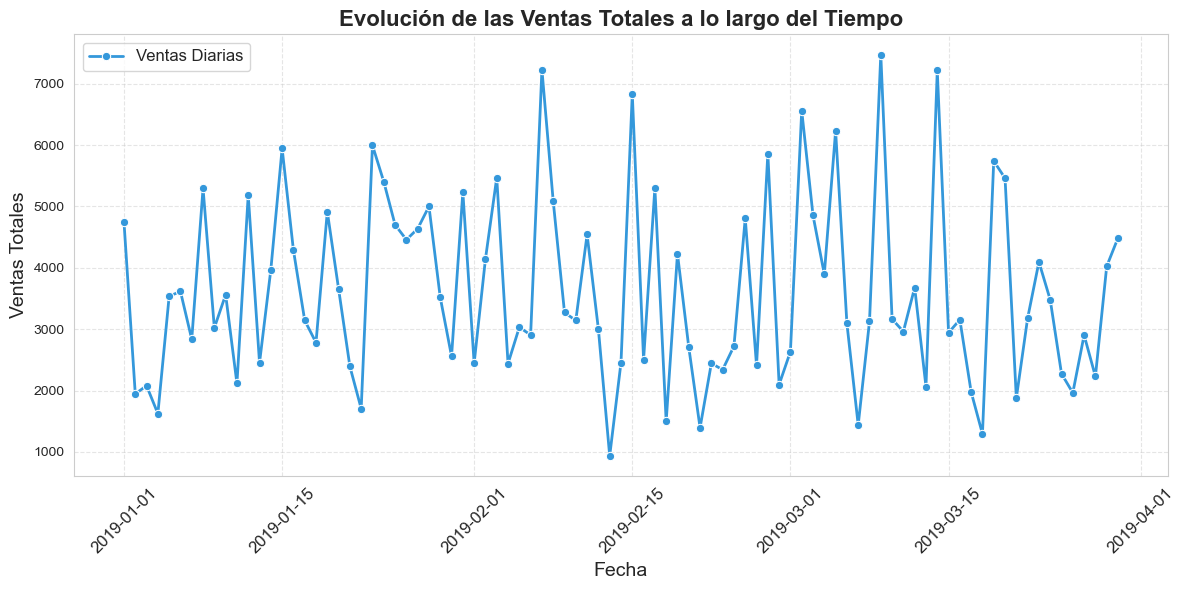

In [4]:
# 1. Evolución de las Ventas Totales
plt.figure(figsize=(12, 6))
ventas_diarias = df.groupby('Date')['Total'].sum()
sns.set_style('whitegrid')
sns.lineplot(x=ventas_diarias.index, y=ventas_diarias.values, 
             color='#3498db', marker='o', linestyle='-', linewidth=2,
             label='Ventas Diarias')
plt.title('Evolución de las Ventas Totales a lo largo del Tiempo', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

Este gráfico de líneas muestra la evolución de las ventas totales (Total) a lo largo del tiempo, agrupadas por fecha (Date). Esta visualización permite:

* Identificar tendencias generales en las ventas, como aumentos o disminuciones a lo largo del período.
* Detectar picos o valles en las ventas, que pueden indicar eventos o cambios significativos en el negocio.
* Analizar el rendimiento general del negocio en el tiempo, lo que es fundamental para la toma de decisiones informadas.

La rotación de las etiquetas del eje X (45 grados) mejora la legibilidad del gráfico, especialmente cuando hay muchas fechas. Además, la cuadrícula facilita la lectura de los valores y la comparación entre diferentes puntos en el tiempo.

Este tipo de gráfico es una herramienta esencial en la visualización de datos para entender el comportamiento de las ventas y el rendimiento del negocio a lo largo del tiempo. Como se discute en la "Unidad 1: Introducción a la Visualización de Información con Python", los gráficos de líneas son ideales para visualizar tendencias y patrones en datos temporales.

### 2\. Ingresos por Línea de Producto:

  * **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

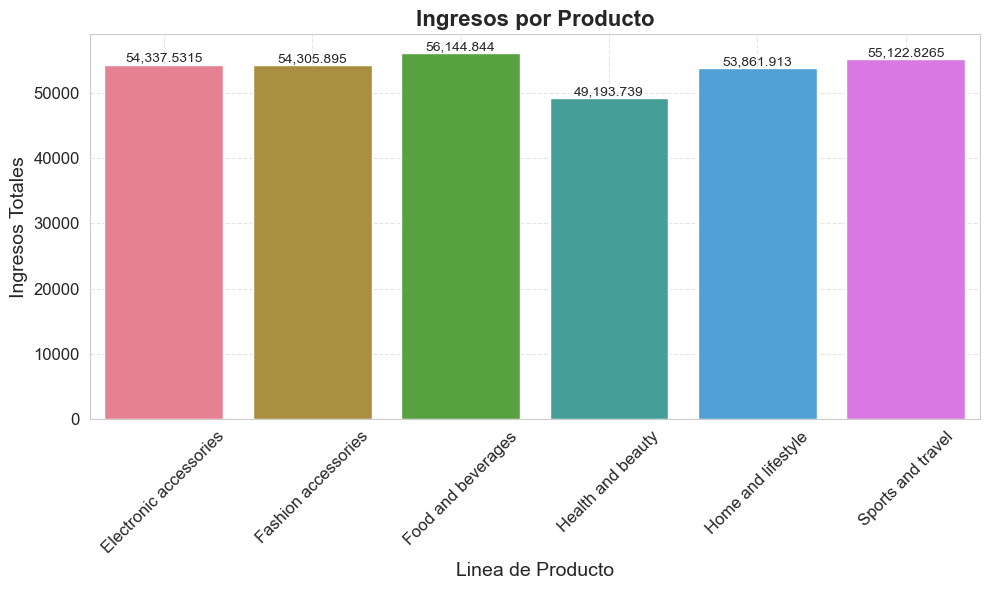

In [5]:
# 2. Calcular la suma de los ingresos por cada 'Product line' Opcion CR

ingresos_por_producto = df.groupby('Product line')['Total'].sum().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', hue='Product line', 
             data=ingresos_por_producto, palette='husl', legend=False)

# Personaliza el gráfico
plt.title('Ingresos por Producto', fontsize=16, fontweight='bold')
plt.xlabel('Linea de Producto', fontsize=14)
plt.ylabel('Ingresos Totales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Agrega etiquetas de valor en cada barra
for i, row in ingresos_por_producto.iterrows():
    plt.text(i, row['Total'], f"{row['Total']:,}", ha='center', va='bottom', fontsize=10)

# Muestra el gráfico
plt.show()

Este gráfico de barras ofrece una comparativa detallada de los ingresos totales generados por cada línea de producto. Las barras están ordenadas de mayor a menor ingreso, lo que facilita la identificación de las líneas de producto más rentables y permite a los responsables de la toma de decisiones centrarse en las áreas de mayor impacto.
La rotación de las etiquetas en el eje X evita la superposición y mejora la legibilidad del gráfico, lo que es especialmente importante cuando se trabaja con grandes cantidades de datos.

Los gráficos de barras son una herramienta visual ideal para comparar cantidades entre diferentes categorías, un concepto fundamental en la visualización de datos. Como se discute en la "Unidad 1: Introducción a la Visualización de Información con Python", este tipo de gráficos permite a los analistas de datos identificar tendencias, patrones y relaciones entre las variables, lo que es esencial para la toma de decisiones informadas.

### 3\. Distribución de la Calificación de Clientes:

  * **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

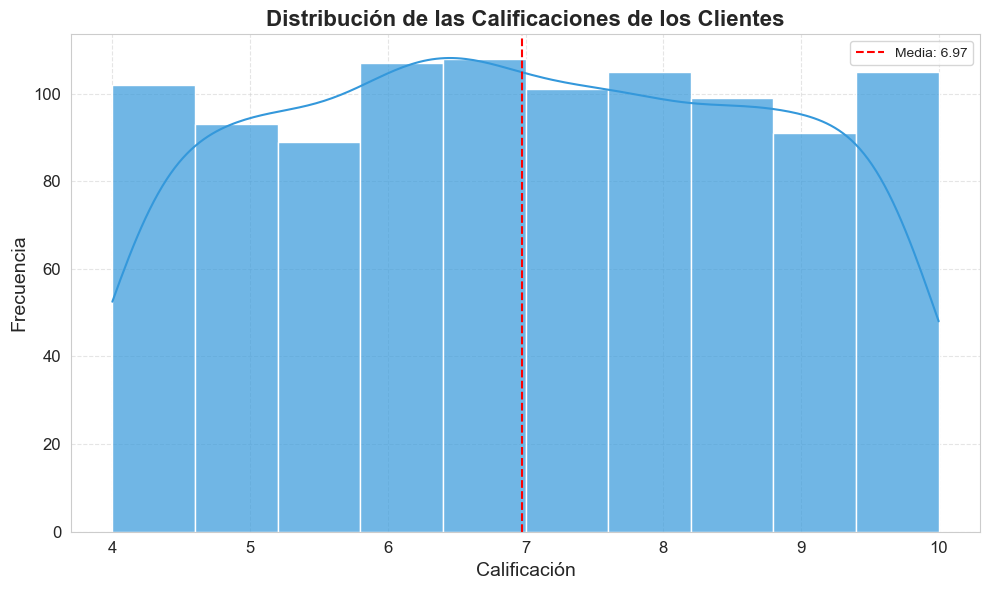

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='#3498db', alpha=0.7)

# Personaliza el gráfico
plt.title('Distribución de las Calificaciones de los Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Calificación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Agrega una línea vertical para resaltar la media
media = df['Rating'].mean()
plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
plt.legend()

# Muestra el gráfico
plt.show()

Este histograma ofrece una representación visual de la frecuencia de las diferentes calificaciones otorgadas por los clientes, proporcionando una visión general del nivel general de satisfacción del cliente. La curva de estimación de densidad del kernel (KDE) superpuesta ayuda a suavizar la forma de la distribución, facilitando la identificación de patrones y tendencias.
La elección de bins=20 divide el rango de calificaciones en 20 intervalos, lo que permite una visualización detallada de la distribución de las calificaciones. Este análisis es fundamental para entender el nivel general de satisfacción del cliente y tomar decisiones informadas.

La media de las calificaciones se incluye en el gráfico mediante una línea vertical, lo que permite:

* Comparar la distribución de las calificaciones con respecto a la media.
* Identificar si la distribución es simétrica o asimétrica con respecto a la media.
* Evaluar si la media es representativa de la distribución general de las calificaciones.

Como se describe en la "Unidad 1", los histogramas y las curvas de estimación de densidad del kernel (KDE) son herramientas esenciales para comprender la distribución de variables numéricas. Estas herramientas permiten a los analistas de datos:

* Visualizar la forma de la distribución de manera clara y concisa.
* Identificar patrones y tendencias en los datos.
* Comprender la dispersión y la variabilidad en los datos.

### 4\. Comparación del Gasto por Tipo de Cliente:

  * **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

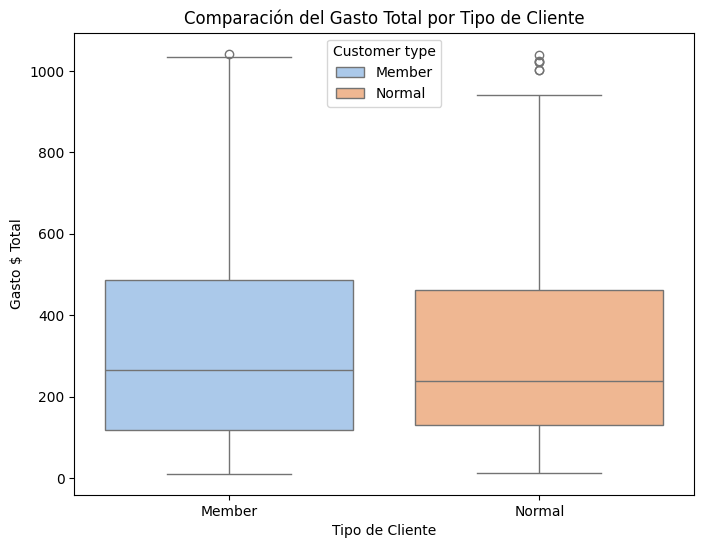

In [51]:
# 4. Comparación del Gasto por Tipo de Cliente
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer type',
            y='Total',
            hue='Customer type',
            data=df,
            palette='pastel',
            legend=True)
plt.title('Comparación del Gasto Total por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Gasto $ Total')
plt.show()

**Explicación:**
Se utiliza un diagrama de caja (box plot) para comparar la distribución del gasto total (`Total`) entre clientes miembros (`Member`) y normales (`Normal`). Este tipo de gráfico es eficaz para mostrar visualmente diferencias clave en la distribución de los datos para cada categoría de cliente. Específicamente, el box plot muestra:

* La **mediana** del gasto (la línea central dentro de la caja), que representa el valor central del gasto para cada tipo de cliente.
* Los **cuartiles**: la caja en sí abarca el rango intercuartílico (IQR), desde el primer cuartil (Q1, percentil 25) hasta el tercer cuartil (Q3, percentil 75). La longitud de la caja indica la dispersión del 50% central de los datos de gasto.
* Los **bigotes** (líneas que se extienden desde la caja) típicamente muestran el rango de los datos, excluyendo los valores atípicos.
* Cualquier **valor atípico** (puntos individuales más allá de los bigotes), que representan transacciones con gastos inusualmente altos o bajos en comparación con el resto de los clientes de ese tipo.

Este gráfico permite una comparación directa de cómo tienden a gastar los miembros versus los clientes normales, si un grupo tiene una mayor variabilidad en su gasto, o si hay más valores extremos en un grupo que en otro. El uso de diagramas de caja para comparar distribuciones entre diferentes categorías es una técnica estándar y efectiva, discutida en la "Unidad 1: Introducción a la Visualización de Información con Python".

### 5\. Relación entre Costo y Ganancia Bruta:

  * **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

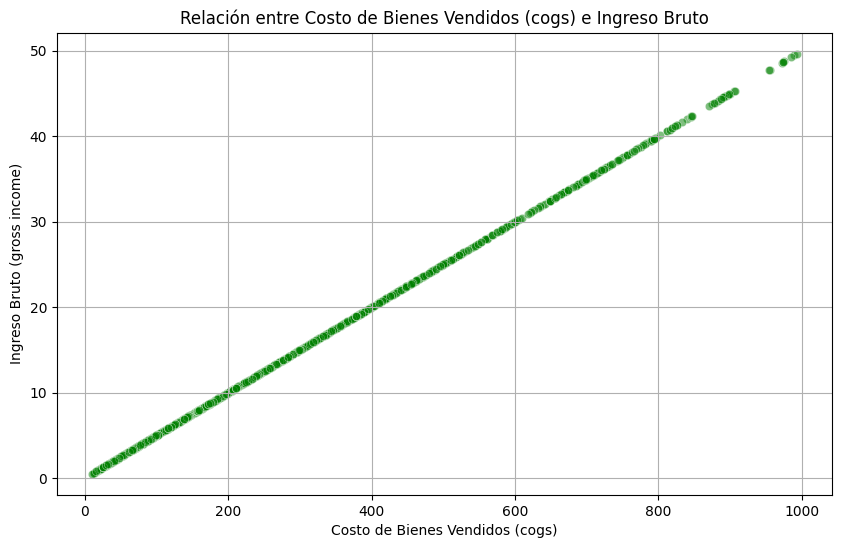

In [52]:
# 5. Relación entre Costo y Ganancia Bruta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cogs', y='gross income', data=df, alpha=0.5, color='green')
plt.title('Relación entre Costo de Bienes Vendidos (cogs) e Ingreso Bruto')
plt.xlabel('Costo de Bienes Vendidos (cogs)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.grid(True)
plt.show()

**Explicación:**
Un gráfico de dispersión se utiliza para explorar la relación entre el costo de los bienes vendidos (`cogs`) y el ingreso bruto (`gross income`). Cada punto representa una transacción. Este gráfico puede ayudar a identificar si existe una correlación lineal entre estas dos variables. La transparencia (`alpha=0.6`) ayuda a visualizar la densidad de puntos en caso de superposición. Los gráficos de dispersión son una herramienta clave para visualizar relaciones entre dos variables numéricas ("Unidad 1").

### 6\. Métodos de Pago Preferidos:

  * **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

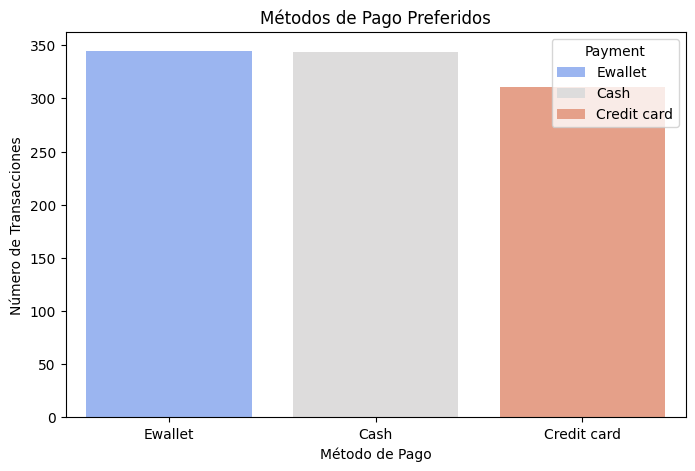

In [38]:
# 6. Métodos de Pago Preferidos
plt.figure(figsize=(8, 5))
payment_counts = df['Payment'].value_counts()
sns.barplot(x=payment_counts.index,
            y=payment_counts.values,
            hue=payment_counts.index,
            palette='coolwarm',
            legend=True)
plt.title('Métodos de Pago Preferidos')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Transacciones')
plt.show()

**Explicación:**
Este gráfico de barras muestra la frecuencia de uso de cada método de pago. Permite identificar rápidamente cuáles son los métodos más populares entre los clientes. Los count plots o gráficos de barras basados en conteos son efectivos para variables categóricas ("Unidad 1").

### 7\. Análisis de Correlación Numérica:

  * **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

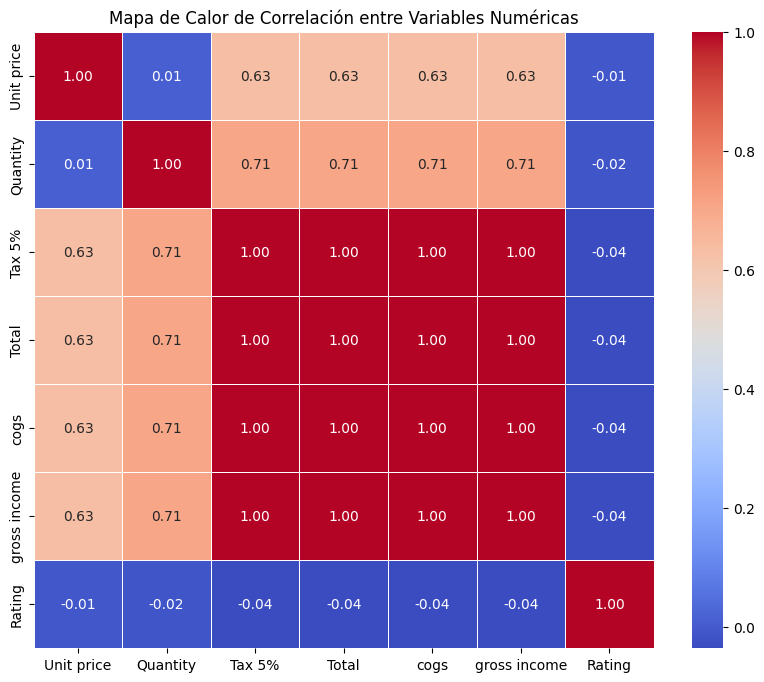

In [ ]:
# 7. Análisis de Correlación Numérica
variables_numericas = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
matriz_correlacion = df[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

**Explicación:**
Un mapa de calor (heatmap) visualiza la matriz de correlación entre las variables numéricas seleccionadas. Los valores de correlación (entre -1 y 1) se representan con colores, y `annot=True` muestra los valores numéricos en cada celda. Esto facilita la identificación de relaciones lineales fuertes o débiles (positivas o negativas) entre pares de variables. Los heatmaps de correlación son una técnica poderosa para datos multivariados, como se menciona en la "Unidad 1" y se expande en la "Unidad 2".

### 8\. Composición del Ingreso Bruto por Sucursal y Línea de Producto:

  * **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

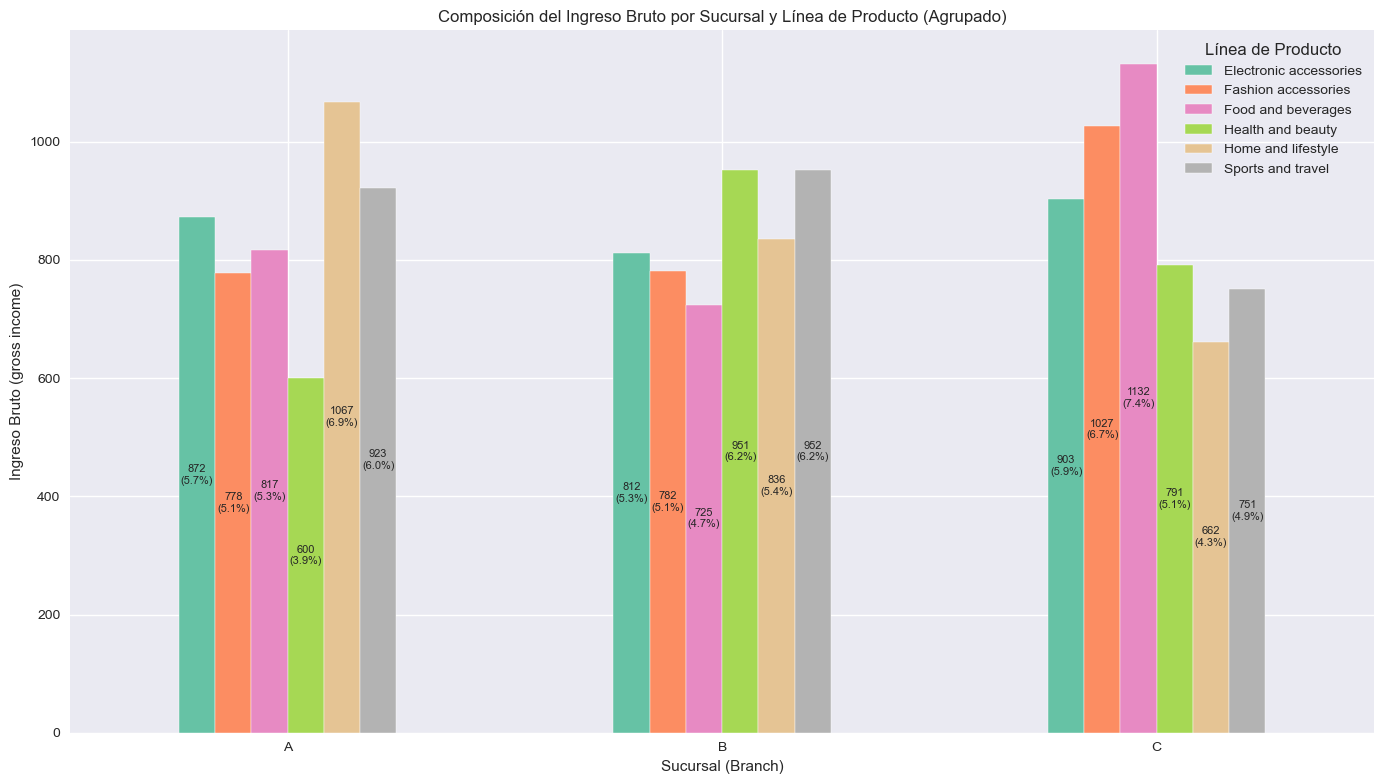

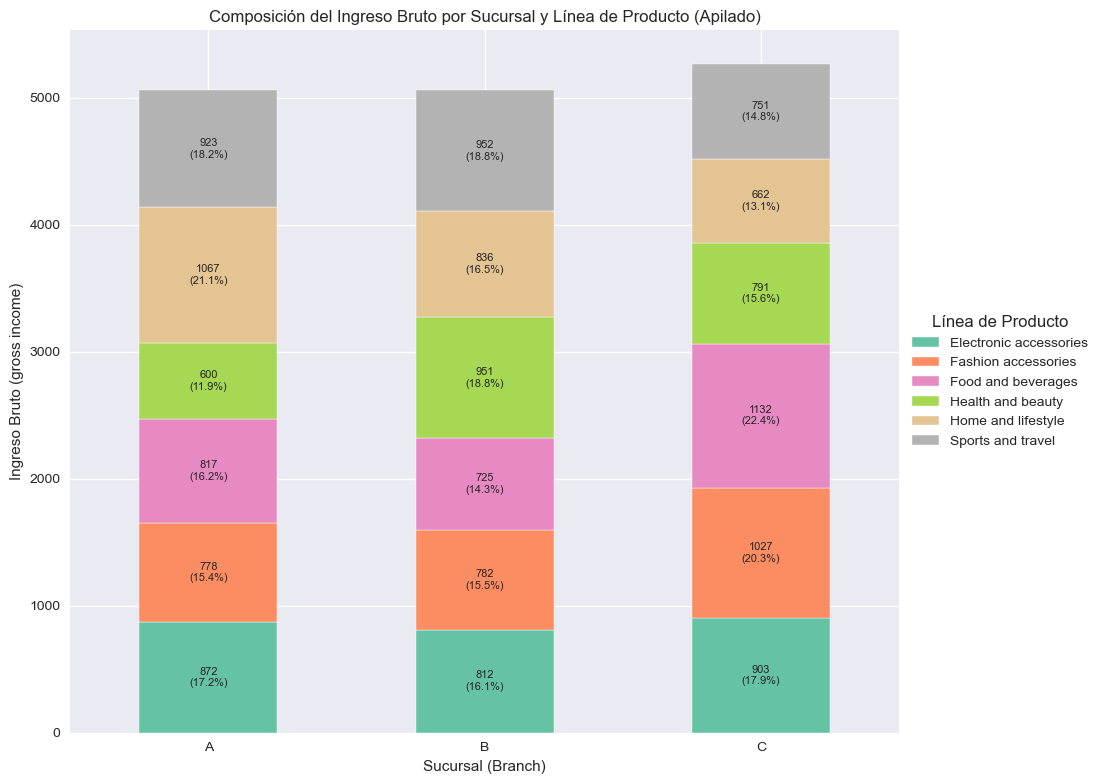

In [22]:
# 8. Composición del Ingreso Bruto por Sucursal y Línea de Producto
ingreso_sucursal_linea = df.groupby(['Branch', 'Product line'])['gross income'].sum().unstack()

# Gráfico de barras agrupadas
ax = ingreso_sucursal_linea.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='Set2')
plt.title('Composición del Ingreso Bruto por Sucursal y Línea de Producto (Agrupado)')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.xticks(rotation=0)
plt.legend(title='Línea de Producto')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.0f}\n({height/ingreso_sucursal_linea.sum().sum()*100:.1f}%)', 
                horizontalalignment='center', verticalalignment='center', fontsize=8)

plt.tight_layout()
plt.show()

# Gráfico de barras apiladas
ax = ingreso_sucursal_linea.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Composición del Ingreso Bruto por Sucursal y Línea de Producto (Apilado)')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.xticks(rotation=0)
plt.legend(title='Línea de Producto', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])

totals = ingreso_sucursal_linea.sum(axis=1)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.0f}\n({height/totals.iloc[int(x)]:.1%})', 
                horizontalalignment='center', verticalalignment='center', fontsize=8)

plt.show()

**Explicación:**

Se presentan dos opciones para visualizar la composición del ingreso bruto por sucursal y línea de producto: un gráfico de barras agrupadas y uno de barras apiladas.

* **Gráfico de Barras Agrupadas (stacked=False):** En este gráfico, cada sucursal (Branch) se representa como un grupo de barras, donde cada barra dentro del grupo corresponde a una línea de producto (Product line) específica. La altura de cada barra indica el ingreso bruto asociado a esa línea de producto en la sucursal correspondiente. Esto permite comparar directamente el ingreso de diferentes líneas de producto dentro de una misma sucursal y entre sucursales.

* **Gráfico de Barras Apiladas (stacked=True):** En este gráfico, cada sucursal tiene una única barra, y los segmentos de esa barra representan el ingreso bruto de cada línea de producto. Esto es útil para visualizar la contribución de cada línea de producto al ingreso total de la sucursal y comparar el ingreso total entre sucursales. Además, se muestra el valor y porcentaje de cada segmento de la barra, lo que facilita la interpretación de los resultados.

Ambos gráficos son ejemplos de gráficos compuestos que permiten visualizar múltiples variables categóricas (sucursal y línea de producto) y una variable numérica (ingreso bruto). La elección entre un gráfico agrupado y uno apilado depende del aspecto específico de la comparación que se desee enfatizar. En este caso, el gráfico apilado es particularmente útil para visualizar la contribución de cada línea de producto al ingreso total de la sucursal.

-----

## 2\. Visualización Básica de Datos

Aquí se explorarán algunas visualizaciones básicas adicionales para complementar los 8 análisis requeridos, enfocándose en la distribución y relaciones entre variables clave.

* **a. Generar gráficos básicos como gráficos de líneas, de dispersión y box plots.**
* **b. Utilicen estos gráficos para explorar la distribución y las relaciones entre las variables seleccionadas.**
* **c. Discutan brevemente qué revelan estos gráficos básicos sobre el conjunto de datos.**

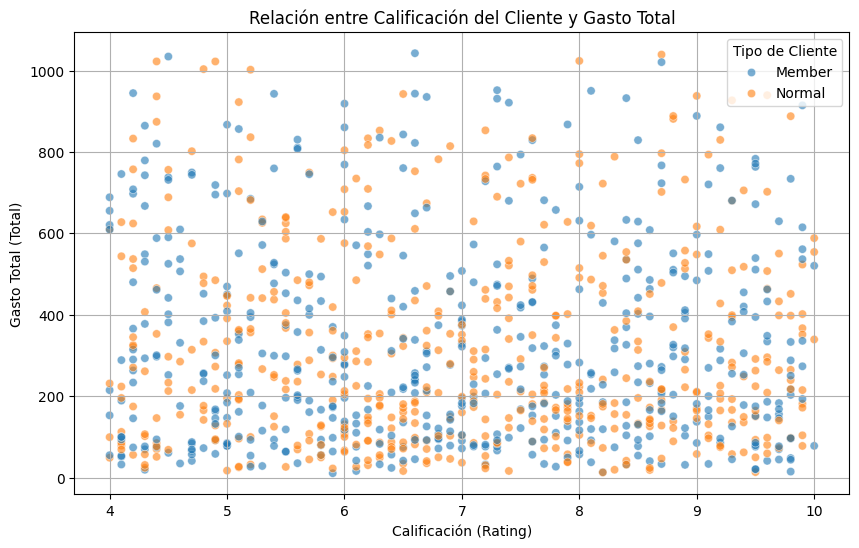

In [56]:
# Gráfico de dispersión - Calificación vs. Gasto Total
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Total', data=df, hue='Customer type', alpha=0.6)
plt.title('Relación entre Calificación del Cliente y Gasto Total')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Gasto Total (Total)')
plt.grid(True)
plt.legend(title='Tipo de Cliente')
plt.show()

**Discusión:** Este gráfico de dispersión explora si hay una relación visible entre la calificación que los clientes dan y cuánto gastan. Al diferenciar por Customer type usando el parámetro hue, podemos también observar si este patrón difiere entre miembros y clientes normales. A primera vista, no parece haber una correlación lineal fuerte y clara entre la calificación y el gasto total, aunque podría haber clusters o tendencias sutiles que un análisis más profundo (o diferentes tipos de gráficos) podría revelar. Los clientes con calificaciones muy altas (cercanas a 10) parecen tener una dispersión amplia en sus gastos.

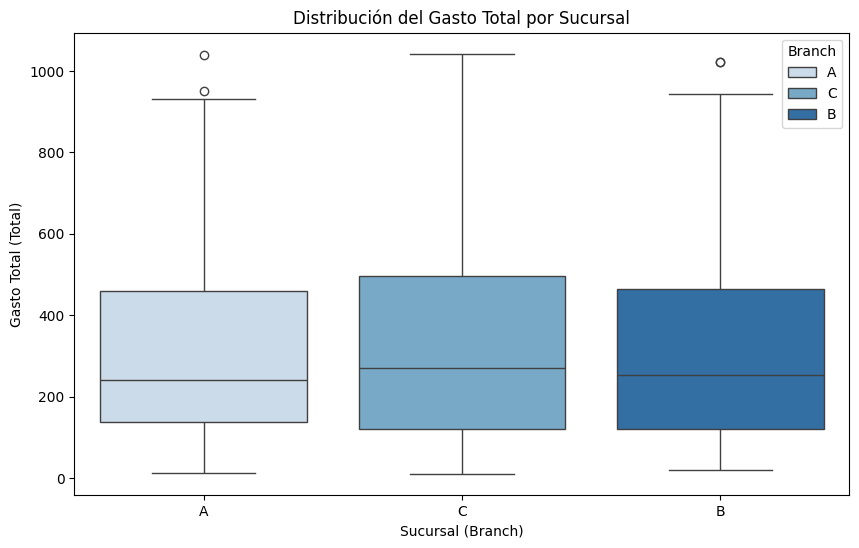

In [60]:
# Box plot - Gasto Total por Sucursal (Branch)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch',
            y='Total',
            hue='Branch',
            data=df,
            palette='Blues',
            legend=True)
plt.title('Distribución del Gasto Total por Sucursal')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Gasto Total (Total)')
plt.show()

**Discusión:** Este box plot compara la distribución del gasto total (Total) entre las diferentes sucursales (Branch). Permite observar si hay diferencias en la mediana del gasto, la dispersión (rango intercuartílico) y la presencia de valores atípicos entre las sucursales. Esto podría indicar, por ejemplo, si una sucursal atiende a clientes que gastan más en promedio o si tiene una mayor variabilidad en los montos de las transacciones. A partir de la "Unidad 1", los box plots son excelentes para comparar distribuciones de una variable numérica a través de diferentes categorías.

-----

## 3\. Gráficos Compuestos y Contextualización

Desarrollar visualizaciones más complejas que combinen múltiples variables o gráficos para una comprensión más profunda.

* **a. Desarrollen visualizaciones más complejas.**
* **b. Expliquen cómo estas visualizaciones compuestas proporcionan una comprensión más profunda.**
* **c. Argumenten la elección de estas visualizaciones en términos de la claridad y la información que aportan.**

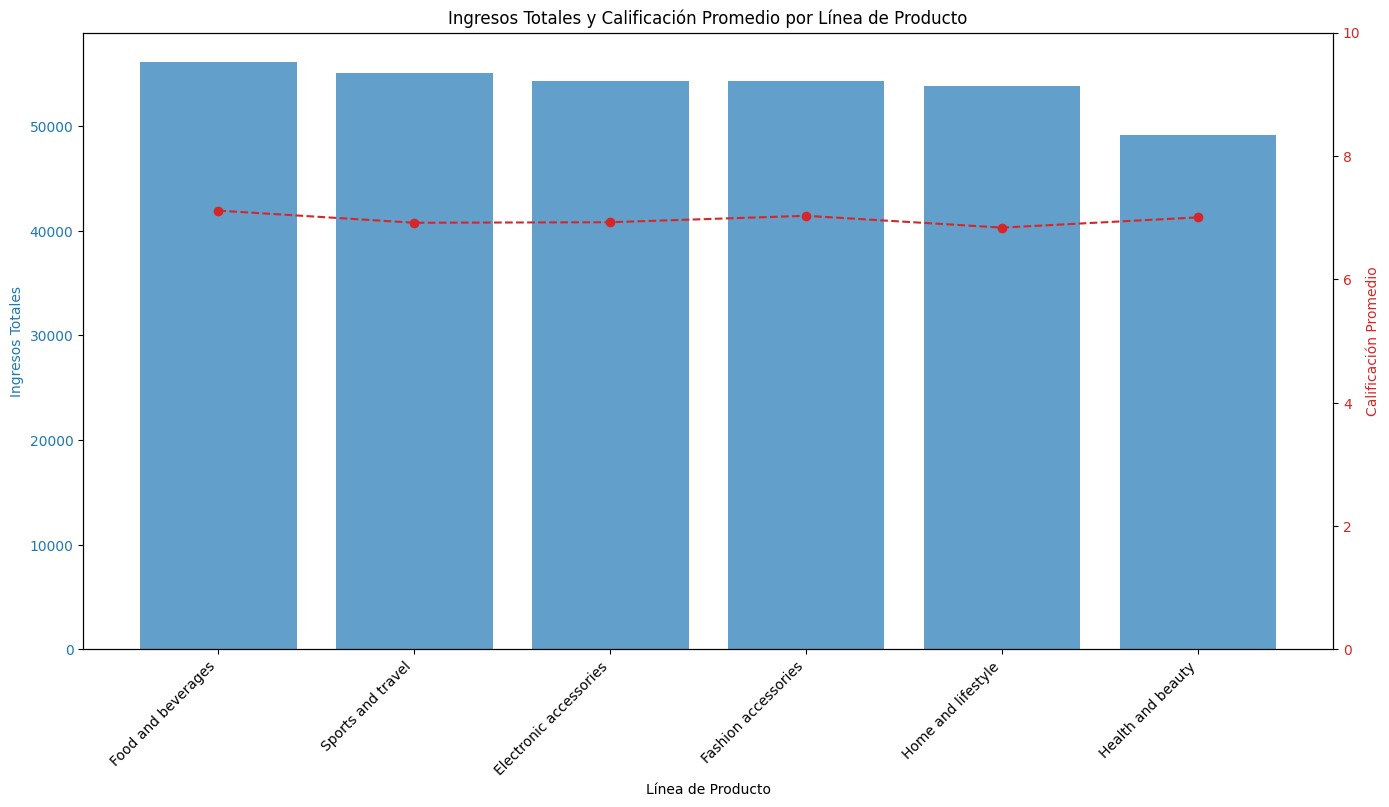

In [63]:
# Gráfico Compuesto: Ingresos por Línea de Producto y Calificación Promedio
ingresos_por_linea = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
rating_promedio_linea = df.groupby('Product line')['Rating'].mean().reindex(ingresos_por_linea.index)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Línea de Producto')
ax1.set_ylabel('Ingresos Totales', color=color)

tick_positions = np.arange(len(ingresos_por_linea.index))
ax1.bar(tick_positions, ingresos_por_linea.values, color=color, alpha=0.7, width=0.8)

ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(ingresos_por_linea.index, rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Calificación Promedio', color=color)
ax2.plot(tick_positions, rating_promedio_linea.values, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 10)

fig.tight_layout()
plt.title('Ingresos Totales y Calificación Promedio por Línea de Producto')
plt.show()

**Explicación y Argumentación:**
Esta visualización compuesta combina un gráfico de barras (ingresos totales por línea de producto) con un gráfico de líneas (calificación promedio por línea de producto) utilizando dos ejes Y.

  * **Comprensión más profunda:** Permite analizar simultáneamente dos métricas clave para cada línea de producto: su rendimiento económico (ingresos) y la satisfacción del cliente (calificación). Podríamos identificar líneas de producto que son muy rentables pero tienen bajas calificaciones (lo que podría indicar un problema a largo plazo) o productos con altas calificaciones pero bajos ingresos (lo que podría sugerir una oportunidad de marketing o un nicho de mercado).
  * **Elección de la visualización:** Se eligió un gráfico de barras para los ingresos porque es efectivo para comparar magnitudes entre categorías. El gráfico de líneas superpuesto para la calificación permite ver la tendencia de satisfacción a través de las mismas categorías de productos sin saturar la visualización. El uso de ejes Y separados es crucial cuando se grafican variables con diferentes escalas y unidades. Esta técnica de gráficos compuestos se alinea con los conceptos de la "Unidad 2" sobre cómo presentar múltiples facetas de los datos. Aporta claridad al mostrar ambas dimensiones de forma integrada, facilitando la identificación de correlaciones o divergencias entre popularidad económica y percepción del cliente.

-----

## 4\. Visualización de Datos Multivariados y de Alta Dimensionalidad

Aplicar técnicas avanzadas adecuadas para múltiples variables.

* **a. Apliquen técnicas avanzadas.**
* **b. Justifiquen la selección de estas técnicas y discutan cómo facilitan la interpretación.**

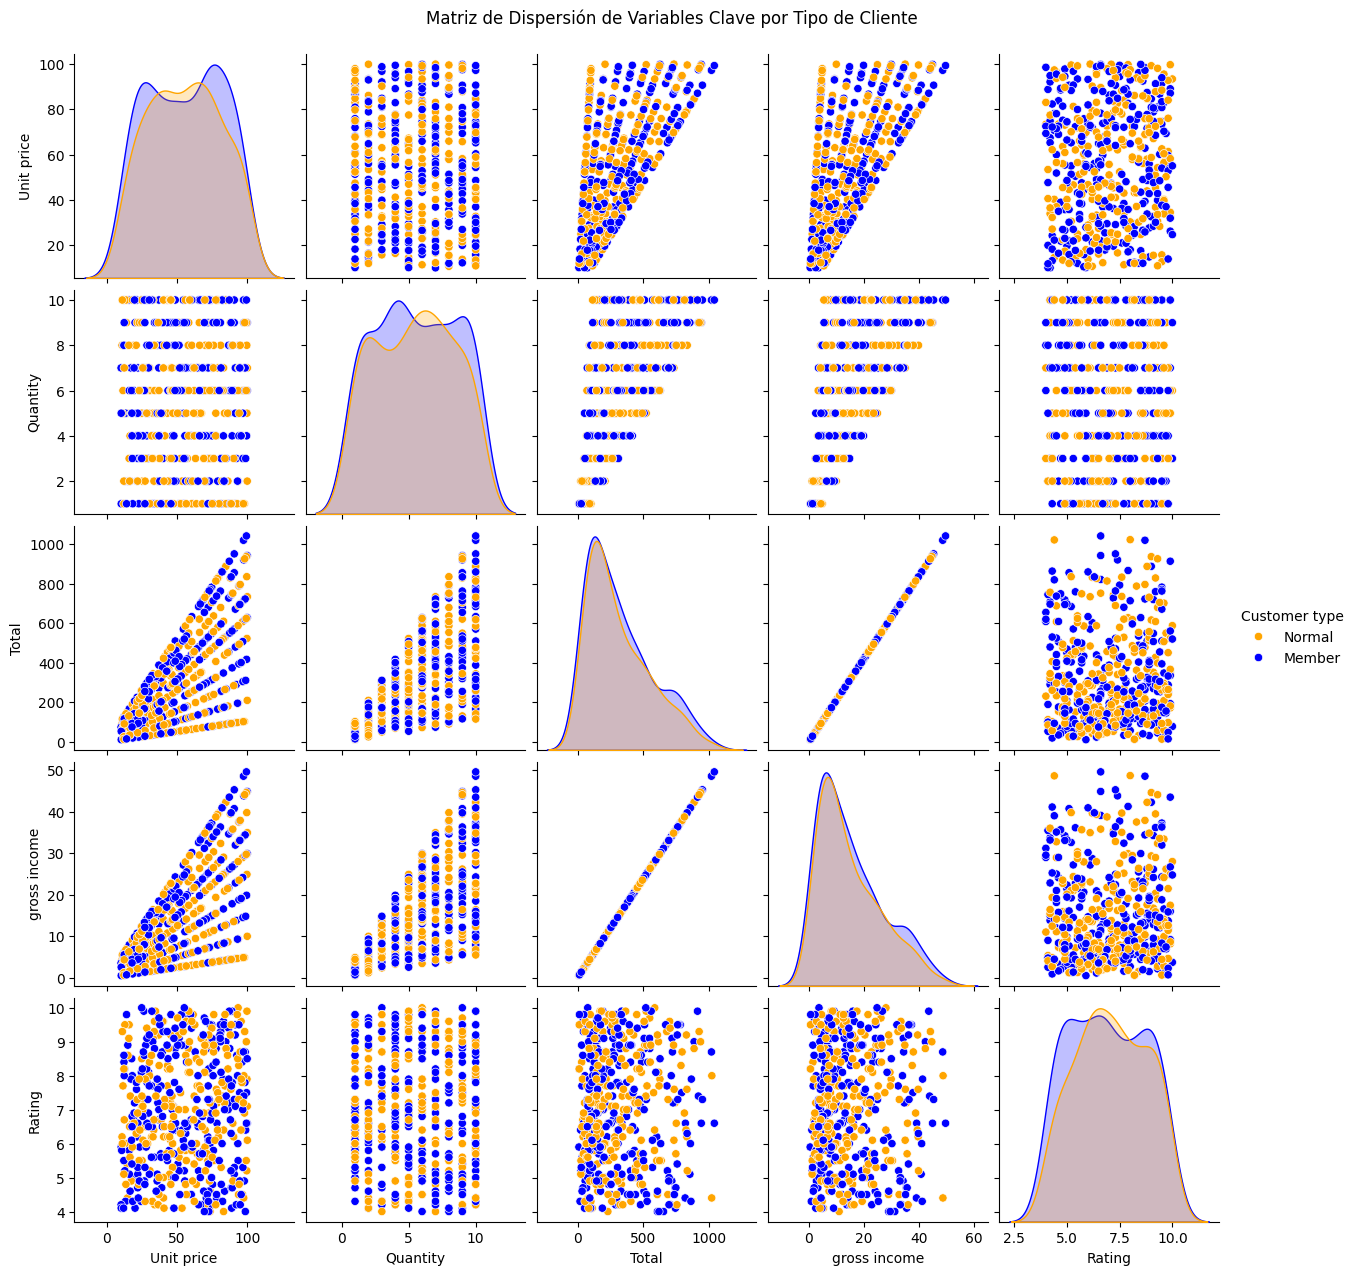

In [64]:
# Matriz de Dispersión (Pair Plot) para explorar relaciones entre variables numéricas clave,
# diferenciadas por tipo de cliente.
variables_pairplot = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating', 'Customer type']
df_sample_pairplot = df[variables_pairplot].sample(n=500, random_state=1) # Muestra para rendimiento

sns.pairplot(df_sample_pairplot, hue='Customer type', palette={'Member':'blue', 'Normal':'orange'}, diag_kind='kde')
plt.suptitle('Matriz de Dispersión de Variables Clave por Tipo de Cliente', y=1.02)
plt.show()

**Justificación y Discusión:**
Se utiliza una **matriz de dispersión (pair plot)** de Seaborn.

  * **Selección:** Esta técnica es ideal para visualizar las relaciones bivariadas entre múltiples variables numéricas simultáneamente. En la diagonal, muestra la distribución univariada de cada variable (en este caso, usando KDEs). Se añade la variable categórica `Customer type` con el parámetro `hue` para observar si las relaciones o distribuciones difieren entre miembros y clientes normales. Se toma una muestra de 500 datos para mejorar el rendimiento de la graficación sin perder la representatividad general de las relaciones.
  * **Facilita la interpretación:**
      * Permite una rápida identificación visual de correlaciones (positivas, negativas, inexistentes) entre pares de variables. Por ejemplo, se puede ver la fuerte relación lineal positiva esperada entre `Quantity` y `Total`, o entre `Total` y `gross income`.
      * Muestra cómo se distribuyen individualmente las variables (`Unit price`, `Rating`, etc.) para cada tipo de cliente.
      * Ayuda a detectar posibles agrupaciones o separaciones entre los tipos de clientes en los diferentes espacios bivariados.
      * Es una herramienta exploratoria poderosa para generar hipótesis sobre las interacciones de las variables antes de realizar análisis estadísticos más formales. Este enfoque es consistente con las técnicas para datos multivariados presentadas en la "Unidad 2".

-----

## 5\. Visualización en 3D

Elegir una variable o relación que se beneficiaría de una representación tridimensional.

* **a. Elijan una variable o una relación entre variables que se beneficiaría de una representación tridimensional.**
* **b. Expliquen por qué una visualización en 3D es apropiada y cómo puede revelar insights que podrían no ser evidentes en dos dimensiones.**
* **c. Presenten y discutan la visualización en 3D creada.**

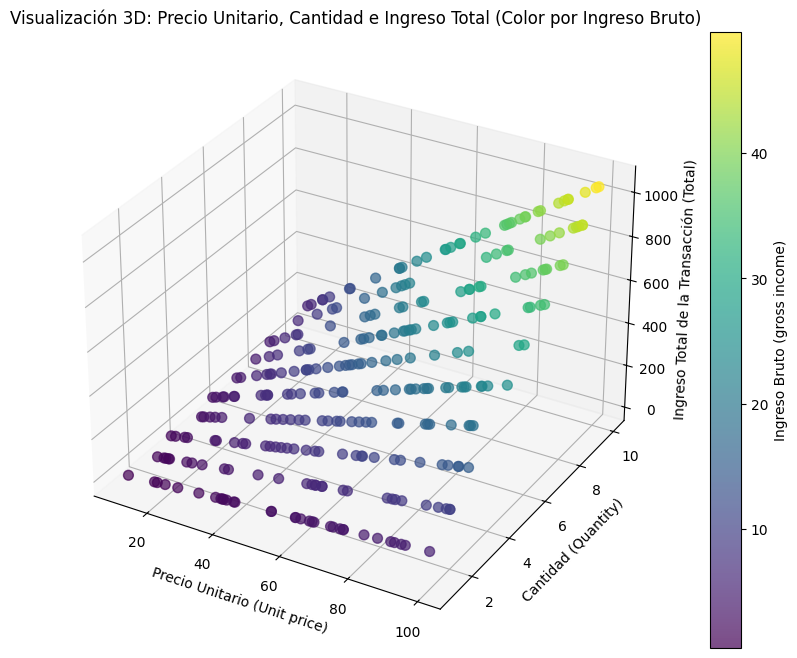

In [ ]:
# Visualización en 3D: Relación entre Precio Unitario, Cantidad e Ingreso Bruto
df_sample_3d = df.sample(n=300, random_state=42)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_sample_3d['Unit price'],
                     df_sample_3d['Quantity'],
                     df_sample_3d['Total'],
                     c=df_sample_3d['gross income'],
                     cmap='viridis',
                     alpha=0.7,
                     s=50) # s es el tamaño del punto

ax.set_xlabel('Precio Unitario (Unit price)')
ax.set_ylabel('Cantidad (Quantity)')
ax.set_zlabel('Ingreso Total de la Transacción (Total)')
ax.set_title('Visualización 3D: Precio Unitario, Cantidad e Ingreso Total (Color por Ingreso Bruto)')

cbar = fig.colorbar(scatter)
cbar.set_label('Ingreso Bruto (gross income)')

plt.show()

**Explicación y Discusión:**

  * **Variables elegidas:** Se ha elegido visualizar la relación entre `Unit price` (eje X), `Quantity` (eje Y) y `Total` (eje Z). Adicionalmente, el color de los puntos representa el `gross income`.
  * **Por qué 3D es apropiado:** El ingreso total de una transacción (`Total`) es fundamentalmente un producto de la cantidad vendida y su precio unitario (más impuestos). Una visualización 3D puede ayudar a entender cómo estas dos variables (`Unit price`, `Quantity`) interactúan para formar el `Total`. Al añadir el `gross income` como una dimensión de color, podemos también inferir visualmente la rentabilidad de diferentes combinaciones de precio y cantidad.
  * **Insights que podría revelar:**
      * Podríamos observar si existen "planos" o superficies donde se concentran las transacciones, indicando combinaciones comunes de precio y cantidad.
      * La coloración por `gross income` podría mostrar si las transacciones con mayor `Total` también son las que generan mayor `gross income`, o si hay combinaciones de precio/cantidad que resultan en un alto volumen de ventas (`Total`) pero bajo margen (`gross income`).
      * Podría ayudar a identificar segmentos de transacciones (ej. bajo precio/alta cantidad vs. alto precio/baja cantidad) y su impacto en el ingreso total y bruto.
  * **Discusión de la visualización 3D:** El gráfico de dispersión 3D muestra cada transacción como un punto en el espacio definido por el precio unitario, la cantidad y el ingreso total. El color de los puntos indica el ingreso bruto. Se observa que, como es de esperar, a medida que la cantidad y/o el precio unitario aumentan, el ingreso total tiende a aumentar. La coloración ayuda a ver que, en general, un mayor ingreso total también se asocia con un mayor ingreso bruto. Sin embargo, la interactividad sería muy útil aquí para rotar el gráfico y explorar diferentes ángulos, ya que las representaciones 3D estáticas pueden ocultar información. Como se menciona en la "Unidad 2", los gráficos 3D pueden ser atractivos pero deben usarse con cuidado para asegurar que aporten valor real al análisis.

-----

## 6\. Integración en un Dashboard (Acorde al PDF) -->


## 2. Integración en un Dashboard (Streamlit)

a.  Utilizando Streamlit, integren **algunas** de sus visualizaciones y hallazgos clave en un dashboard interactivo.

b.  Asegúrense de que el dashboard sea intuitivo y bien organizado (usen títulos, texto explicativo, widgets interactivos como sliders o selectores para filtrar datos).

c.  Reflexionen sobre cómo la interactividad del dashboard mejora la experiencia del usuario y el proceso de toma de decisiones basado en los datos presentados.

**Instrucciones:**
1.  Escriban el código completo de su aplicación Streamlit en la celda de código de abajo.
2.  Copien ese código a un archivo de texto simple llamado `dashboard_tarea.py` (o el nombre que prefieran).
3.  Abran una terminal o Anaconda Prompt, naveguen a la carpeta donde guardaron el archivo.
4.  Ejecuten el comando: `streamlit run dashboard_tarea.py`
5.  Interactúen con su dashboard en el navegador.
6.  **Importante:** En la celda de Markdown siguiente, describan su dashboard, qué visualizaciones incluye, qué interacciones permite, y adjunten el código de su script de python.

# --- Describan su Dashboard (Gráficos Utilizados y Justificación de su uso) --- 

'''
**Descripción del Dashboard de Análisis de Ventas**

**Objetivo del Dashboard:**
El dashboard tiene como objetivo proporcionar una herramienta interactiva para que la cadena de tiendas de conveniencia explore sus datos de ventas y el comportamiento de los clientes. Busca facilitar la identificación de tendencias, patrones y áreas de oportunidad para mejorar la estrategia de marketing y la toma de decisiones basada en datos.

**Visualizaciones Incluidas y Justificación:**

1.  **Evolución de las Ventas Totales (Gráfico de Líneas):**
    * **Justificación:** Permite visualizar la tendencia general de las ventas a lo largo del tiempo. Es fundamental para entender el crecimiento, la estacionalidad y el impacto de eventos o campañas.
    * **Interactividad:** Filtro por rango de fechas para analizar periodos específicos.

2.  **Ingresos Totales por Línea de Producto (Gráfico de Barras):**
    * **Justificación:** Identifica rápidamente las líneas de producto más y menos rentables en términos de ingresos. Esencial para la gestión de inventario y estrategias de promoción.
    * **Interactividad:** Filtro por Sucursal (`Branch`) para comparar el rendimiento de las líneas de producto en diferentes ubicaciones.

3.  **Distribución de Calificaciones de Clientes (Histograma con KDE):**
    * **Justificación:** Muestra el nivel general de satisfacción del cliente. Ayuda a entender la percepción de la calidad del servicio o productos.
    * **Interactividad:** Filtro por Tipo de Cliente (`Customer type`) para ver si la satisfacción varía entre miembros y no miembros.

4.  **Comparación del Gasto por Tipo de Cliente (Box Plots):**
    * **Justificación:** Compara la distribución del gasto entre clientes miembros y normales. Clave para evaluar el valor del programa de membresía y segmentar clientes.
    * **Interactividad:** Selección de Sucursal (`Branch`) para analizar si el comportamiento de gasto por tipo de cliente varía geográficamente.

5.  **Métodos de Pago Preferidos (Gráfico de Barras):**
    * **Justificación:** Muestra la popularidad de los diferentes métodos de pago, lo que puede influir en decisiones sobre la infraestructura de pagos.
    * **Interactividad:** Filtro por Ciudad (`City`) para identificar preferencias de pago regionales.

**Interacciones Permitidas:**
El dashboard incluye los siguientes widgets interactivos en una barra lateral (`st.sidebar`):
* **Selector de Rango de Fechas:** Para filtrar los datos de ventas en un periodo específico, afectando principalmente el gráfico de evolución de ventas.
* **Selector de Sucursal (`Branch`):** Para filtrar los datos y visualizar el rendimiento y comportamiento específico de una sucursal. Afecta a los ingresos por línea de producto y al gasto por tipo de cliente.
* **Selector de Tipo de Cliente (`Customer type`):** Para filtrar y comparar la satisfacción y otros comportamientos entre miembros y clientes normales.
* **Selector de Ciudad (`City`):** Para analizar las preferencias de pago y otros indicadores a nivel de ciudad.

**Organización:**
El dashboard está organizado con un título principal y secciones claras para cada visualización. La barra lateral contiene todos los filtros para mantener el área principal de visualización despejada. Cada gráfico tiene un título descriptivo y etiquetas claras en los ejes.

**Reflexión sobre la Interactividad:**
La interactividad del dashboard, proporcionada por Streamlit, mejora significativamente la experiencia del usuario y el proceso de toma de decisiones. En lugar de consumir un informe estático, los usuarios (gerentes de tienda, analistas de marketing, etc.) pueden:
* **Explorar Dinámicamente:** Realizar sus propias preguntas y explorar los datos según sus necesidades específicas. Por ejemplo, un gerente de la Sucursal 'A' puede filtrar rápidamente para ver solo el rendimiento de su tienda.
* **Descubrir Insights más Profundos:** Al cambiar los filtros, pueden surgir patrones o correlaciones que no serían evidentes en visualizaciones predefinidas. Por ejemplo, descubrir que una línea de producto es muy popular en una ciudad pero no en otra.
* **Validar Hipótesis:** Si tienen una corazonada sobre, por ejemplo, el comportamiento de los clientes miembros durante un mes específico, pueden usar los filtros para verificarlo.
* **Comunicación Efectiva:** El dashboard puede servir como una herramienta de comunicación dinámica en reuniones, permitiendo explorar datos en tiempo real para responder preguntas.
* **Toma de Decisiones Ágil:** La capacidad de obtener respuestas rápidas a preguntas específicas sobre los datos permite una toma de decisiones más ágil y basada en evidencia. Por ejemplo, si se observa una caída en las ventas en una línea de producto específica en una sucursal, se pueden investigar las causas y tomar acciones correctivas más rápidamente.

En resumen, la interactividad transforma la visualización de datos de una presentación pasiva a una herramienta activa de descubrimiento y análisis, empoderando a los usuarios para extraer más valor de sus datos.
'''

In [ ]:
# --- CÓDIGO PARA dashboard_tarea_grupo_X.py --- 
# (Este bloque NO se ejecuta directamente en Jupyter)

''' 
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar datos
@st.cache_data
def load_data():
    df = pd.read_csv("data.csv")
    df["Date"] = pd.to_datetime(df["Date"])
    df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour
    return df

plt.style.use("ggplot")      
plt.style.use("fivethirtyeight")  
plt.style.use("bmh")      

df = load_data()

# Título
st.title("Análisis de Ventas - Supermercado")

# Sidebar con filtros
with st.sidebar:
    st.header("Filtros")

    # Filtros binarios SIEMPRE visibles
    genders = st.radio("Género", options=["Todos"] + df["Gender"].unique().tolist(), horizontal=True)
    customers = st.radio("Tipo de Cliente", options=["Todos"] + df["Customer type"].unique().tolist(), horizontal=True)
    date_range = st.date_input("Rango de Fechas", [df["Date"].min(), df["Date"].max()])

    # Ciudad

    all_cities = sorted(df["City"].unique().tolist())
    city_options = ["Seleccionar todos"] + all_cities
    selected_cities = st.multiselect("Ciudad", city_options, default=[])

    if "Seleccionar todos" in selected_cities and len(selected_cities) > 1:
        selected_cities = [c for c in selected_cities if c != "Seleccionar todos"]

    if "Seleccionar todos" in selected_cities:
        cities = all_cities
    elif selected_cities:
        cities = selected_cities
    else:
        cities = []  # No selection

    # Línea de producto

    all_products = sorted(df["Product line"].unique().tolist())
    product_options = ["Seleccionar todos"] + all_products
    selected_products = st.multiselect("Línea de Producto", product_options, default=[])

    if "Seleccionar todos" in selected_products and len(selected_products) > 1:
        selected_products = [p for p in selected_products if p != "Seleccionar todos"]

    if "Seleccionar todos" in selected_products:
        products = all_products
    elif selected_products:
        products = selected_products
    else:
        products = []  # No selection



# Construir condiciones de filtro
filtered_df = df.copy()

if cities:
    filtered_df = filtered_df[filtered_df["City"].isin(cities)]

if products:
    filtered_df = filtered_df[filtered_df["Product line"].isin(products)]

if genders != "Todos":
    filtered_df = filtered_df[filtered_df["Gender"] == genders]

if customers != "Todos":
    filtered_df = filtered_df[filtered_df["Customer type"] == customers]

filtered_df = filtered_df[
    (filtered_df["Date"] >= pd.to_datetime(date_range[0])) &
    (filtered_df["Date"] <= pd.to_datetime(date_range[1]))
]

# Crear resumen de filtros
filtros = []

# Género
if genders != "Todos":
    filtros.append(f"{genders.lower()}s")
else:
    filtros.append("personas de todos los géneros")

# Tipo de cliente
if customers != "Todos":
    filtros.append(f"clientes {customers.lower()}")
else:
    filtros.append("clientes de todos los tipos")

# Ciudades
if cities and len(cities) == 1:
    filtros.append(f"de la ciudad de {cities[0]}")
elif cities and len(cities) > 1:
    filtros.append(f"de las ciudades: {', '.join(cities)}")
else:
    filtros.append("de todas las ciudades")

# Producto
if products and len(products) == 1:
    filtros.append(f"en la categoría {products[0]}")
elif products and len(products) > 1:
    filtros.append(f"en las categorías: {', '.join(products)}")
else:
    filtros.append("de todas las categorías de productos")

# Rango de fechas
fecha_inicio = date_range[0].strftime("%d/%m/%Y")
fecha_fin = date_range[1].strftime("%d/%m/%Y")
filtros.append(f"entre el {fecha_inicio} y el {fecha_fin}")

# Mostrar resumen
st.markdown(f"**Datos filtrados para:** {', '.join(filtros)}.")


# Mostrar resultados si hay datos
if not filtered_df.empty:

    st.metric("Total de Ventas ($)", f'{filtered_df["Total"].sum():,.2f}')
    st.metric("Unidades Vendidas", int(filtered_df["Quantity"].sum()))
    st.metric("Promedio por Transacción", f'{filtered_df["Total"].mean():,.2f}')

    st.subheader("Ventas por Línea de Producto")
    product_sales = filtered_df.groupby("Product line")["Total"].sum().sort_values()

    fig1, ax1 = plt.subplots(figsize=(10, 12))
    bars = ax1.barh(product_sales.index, product_sales.values, color="#1f77b4", edgecolor="black")

    for bar in bars:
        width = bar.get_width()
        label_x_pos = width * 0.5 
        ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f"${width:,.0f}", va='center', ha='right', color="white", fontsize=20)

    ax1.set_xlabel("Ventas ($)", fontsize=12)
    ax1.set_ylabel("Línea de Producto", fontsize=12)
    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    st.pyplot(fig1)


    st.subheader("Ventas por Fecha")
    daily_sales = filtered_df.groupby("Date")["Total"].sum()

    fig2, ax2 = plt.subplots(figsize=(10, 4))  # más ancho ayuda
    ax2.plot(daily_sales.index, daily_sales.values, marker='o', color="#ff7f0e", linewidth=2)

    # Mejoras estéticas
    ax2.set_ylabel("Ventas ($)", fontsize=12)
    ax2.set_xlabel("Fecha", fontsize=12)
    ax2.grid(True, linestyle="--", alpha=0.5)
    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    # Rotar y formatear fechas
    ax2.tick_params(axis='x', rotation=45)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

    st.pyplot(fig2)





    st.subheader("Ventas por Horas del Día")
    sales_by_hour = filtered_df.groupby("Hour")["Total"].sum()
    fig3, ax = plt.subplots()
    sales_by_hour.plot(kind="bar", ax=ax)
    ax.set_xlabel("Hora")
    ax.set_ylabel("Ventas ($)")
    st.pyplot(fig3)
    

    st.subheader("Distribución de Métodos de Pago")
    payment_counts = filtered_df["Payment"].value_counts()
    fig4, ax = plt.subplots()
    payment_counts.plot(kind="pie", autopct='%1.1f%%', ax=ax)
    ax.set_ylabel("")  
    st.pyplot(fig4)

    st.subheader("Distribución de Calificaciones por Tipo de Cliente")

    fig5, ax = plt.subplots(figsize=(8, 4))

    # Histogramas para cada tipo de cliente
    colors = {"Member": "#1f77b4", "Normal": "#ff7f0e"}
    for customer_type in filtered_df["Customer type"].unique():
        subset = filtered_df[filtered_df["Customer type"] == customer_type]
        ax.hist(subset["Rating"], bins=20, alpha=0.3, label=customer_type ,color=colors[customer_type])

    ax.set_xlabel("Rating (1 a 10)")
    ax.set_ylabel("Frecuencia")
    ax.legend(title="Tipo de Cliente",loc="lower right")
    st.pyplot(fig5)

    # st.subheader("Distribución de Calificaciones por Tipo de Cliente")
    # fig5, ax = plt.subplots()
    # filtered_df.boxplot(column="Rating", by="Customer type", ax=ax, grid=False)
    # ax.set_title("Distribución de Calificaciones")
    # ax.set_xlabel("Tipo de Cliente")
    # ax.set_ylabel("Rating (1 a 10)")
    # plt.suptitle("") 
    # st.pyplot(fig5)

    # st.subheader("Datos Filtrados")
    # st.dataframe(filtered_df)
else:
    st.warning(" No hay datos para mostrar con los filtros seleccionados.")


'''

# 3. Deployment

a.  Desplieguen su dashboard en Streamlit Cloud.

b.  Asegúrense de que el dashboard sea accesible públicamente.

c.  Proporcionen el enlace al dashboard desplegado en la celda de Markdown siguiente.

d.  Reflexionen sobre el proceso de despliegue y cualquier desafío que hayan enfrentado.


En el caso que no hayan podido deployar:

In [ ]:
'''
Comentar si hubo problemas con el código o si no se ejecutó correctamente que les impidieron realizar el análisis completo y el deployment del dashboard.
'''

En principal problema que encontramos, fue al momento de instalar la libreria streamlit, ya que nos tiraba un error asociado con stream.clic, pero se logró resolver creando un eviorment, donde se pudieron instalar las dependecias. 

En el caso que hayan podido deployar:

In [ ]:
'''
Poner aquí la url de su dashboard en el servidor de Streamlit.
Ejemplo: https://share.streamlit.io/streamlit/demo-uber-nyc-pickups
'''

# 4. Conclusiones Generales

Reflexionen sobre el proceso de análisis y visualización. ¿Qué aprendieron sobre los datos de la tienda? ¿Qué limitaciones encontraron en los datos o en las técnicas de visualización? ¿Qué recomendaciones (basadas en los datos) podrían darle a la cadena de tiendas?

A partir del análisis realizado, se obtuvo información valiosa en relación con las variables estudiadas. Por ejemplo, si bien la categoría “Food and Beverages” presenta el mayor volumen de ventas, la diferencia con el resto de categorías no es significativa. Esto sugiere que la tienda mantiene una oferta bien diversificada, lo que reduce su dependencia de una sola línea de productos.
En cuanto a las ventas por fecha, se observa una alta dispersión. Sería necesario profundizar en el análisis para determinar si los picos detectados están relacionados con feriados, promociones o fines de semana, lo cual permitiría diseñar estrategias comerciales más efectivas para esos días específicos.
Respecto a las ventas por hora del día, se destaca un mayor volumen alrededor de las 13:00 y las 19:00 horas, lo que podría coincidir con los horarios de almuerzo y salida laboral. Esto representa una oportunidad para reforzar la atención o lanzar promociones temporales en esos momentos clave.
La distribución de los métodos de pago es relativamente equilibrada, sin una preferencia marcada por parte de los clientes. Esta equidad en el uso sugiere una buena adaptabilidad de la tienda a las distintas formas de pago disponibles.
Finalmente, al analizar la distribución de calificaciones (rating), se aprecia una distribución bastante homogénea entre los valores de 4 y 10. Se detectan ligeros picos en las calificaciones de 6 y 7 para clientes normales, y en 5 y 9 para clientes miembros. Sería recomendable complementar este análisis con encuestas cualitativas que permitan identificar las causas de estas valoraciones. Idealmente, se buscaría concentrar las calificaciones hacia los valores más altos, como reflejo de una excelente experiencia de compra y servicio.

In [ ]:
'''
Escriban acá su reflexión sobre el Dashboard.

'''

El desarrollo de este Dashboard permitió transformar un conjunto de datos en una herramienta visual clara, interactiva y funcional para el análisis comercial de una tienda. A través de sus filtros dinámicos y visualizaciones, se logró identificar patrones clave en el comportamiento de los clientes, tales como los horarios de mayor actividad, los productos más vendidos y la distribución de calificaciones.

Uno de los principales aprendizajes fue comprender la importancia de la diversificación en las ventas por categoría, así como la necesidad de evaluar los picos de compra en determinadas fechas u horarios para optimizar recursos y promociones. Además, el equilibrio observado en los métodos de pago demuestra que la tienda está preparada para distintos perfiles de clientes.


# 5. Referencias

Listar las fuentes utilizadas (dataset, bibliotecas principales, material de referencia adicional si aplica).

In [ ]:
'''
**Fuentes Utilizadas:**

* **Dataset:**
    * Supermarket Sales. (2019). Kaggle. Recuperado de [https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) (Archivo: `data.csv`)

* **Bibliotecas Principales de Python:**
    * **Pandas:** Para la manipulación y análisis de datos. (McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2da ed.). O'Reilly Media.)
    * **Matplotlib:** Para la creación de visualizaciones estáticas, animadas e interactivas. (Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.)
    * **Seaborn:** Para la creación de gráficos estadísticos informativos y atractivos, basada en Matplotlib. (Waskom, M. L., et al. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.)
    * **NumPy:** Para el soporte de arrays y matrices de gran tamaño, junto con una colección de funciones matemáticas de alto nivel.
    * **Streamlit:** Para la creación de dashboards web interactivos.

* **Material de Estudio del Curso (Universidad Autónoma de Chile):**
    * Unidad 1: Introducción a la Visualización de Información con Python.pdf
    * Unidad 2: Visualización Avanzada y Herramientas Interactivas.pdf
    * Unidad 3: Visualización de Datos Geoespaciales y de Red.pdf (Contexto general sobre visualización)
    * Unidad 4: Visualización para Insights y Storytelling.pdf
    * INTRODUCCIÓN A LA VISUALIZACIÓN DE INFORMACIÓN CON PYTHON.pdf
    * VISUALIZACIÓN AVANZADA Y HERRAMIENTAS INTERACTIVAS.pdf
    * VISUALIZACIÓN DE DATOS GEOESPACIALES Y DE RED.pdf (Contexto general sobre visualización)
    * VISUALIZACIÓN PARA INSIGHTS Y STORYTELLING.pdf

* **Documentación Oficial de las Bibliotecas:**
    * Pandas: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
    * Matplotlib: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
    * Seaborn: [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)
    * Streamlit: [https://docs.streamlit.io/](https://docs.streamlit.io/)
'''

## NOTA FINAL:
### Asegúrense de sólo subir el jupyter notebook a la plataforma, con un formato del tipo: "Trabajo_Grupo_X.ipynb".
### No es necesario incluir el archivo .py del dashboard, pero sí el código dentro de este cuaderno en el apartado correspondiente.